<h1 align='center' style=color:cyan;text-weight:800>
1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
</h1>

In [157]:
# Librerías utilizadas en el documento
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remueve los warnings
import warnings
warnings.filterwarnings('ignore')



Carga de archivos

In [158]:
df_hom = pd.read_csv('datasets\df_homicidios.csv')
df_hom_vic = pd.read_csv('datasets\df_vic_hom.csv')

In [159]:
df_hom.head(3)

,ID_HECHO,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,XY (CABA),LONGITUD,LATITUD,VEHICULO_ACUSADO
0,2016-0001,1,2016-01-01,4.0,AVENIDA,8.0,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,AUTO
1,2016-0002,1,2016-01-02,1.0,GRAL PAZ,9.0,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,PASAJEROS
2,2016-0003,1,2016-01-03,7.0,AVENIDA,1.0,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,AUTO


Cambio de tipos de variables para mejor aprovechamiento de las librerias

In [160]:
# Cambio de tipo a la columna hora
df_hom['HORA'] = df_hom['HORA'].fillna(0).astype('int')

# cambio a formato categórico
df_hom['TIPO_DE_CALLE'] = df_hom['TIPO_DE_CALLE'].astype('category')
df_hom['COMUNA'] = df_hom['COMUNA'].astype('category')
df_hom['VEHICULO_ACUSADO'] = df_hom['VEHICULO_ACUSADO'].astype('category')

# Fecha
df_hom['FECHA'] = df_hom['FECHA'].astype('datetime64[ns]')


# cambio a float los valores de latitud y longitud
df_hom['LONGITUD'] = df_hom['LONGITUD'].astype('float')
df_hom['LATITUD'] = df_hom['LATITUD'].astype('float')

df_hom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_HECHO          696 non-null    object        
 1   N_VICTIMAS        696 non-null    int64         
 2   FECHA             696 non-null    datetime64[ns]
 3   HORA              696 non-null    int32         
 4   TIPO_DE_CALLE     696 non-null    category      
 5   COMUNA            696 non-null    category      
 6   XY (CABA)         682 non-null    object        
 7   LONGITUD          684 non-null    float64       
 8   LATITUD           684 non-null    float64       
 9   VEHICULO_ACUSADO  673 non-null    category      
dtypes: category(3), datetime64[ns](1), float64(2), int32(1), int64(1), object(2)
memory usage: 38.7+ KB


Plot de variable categoricas

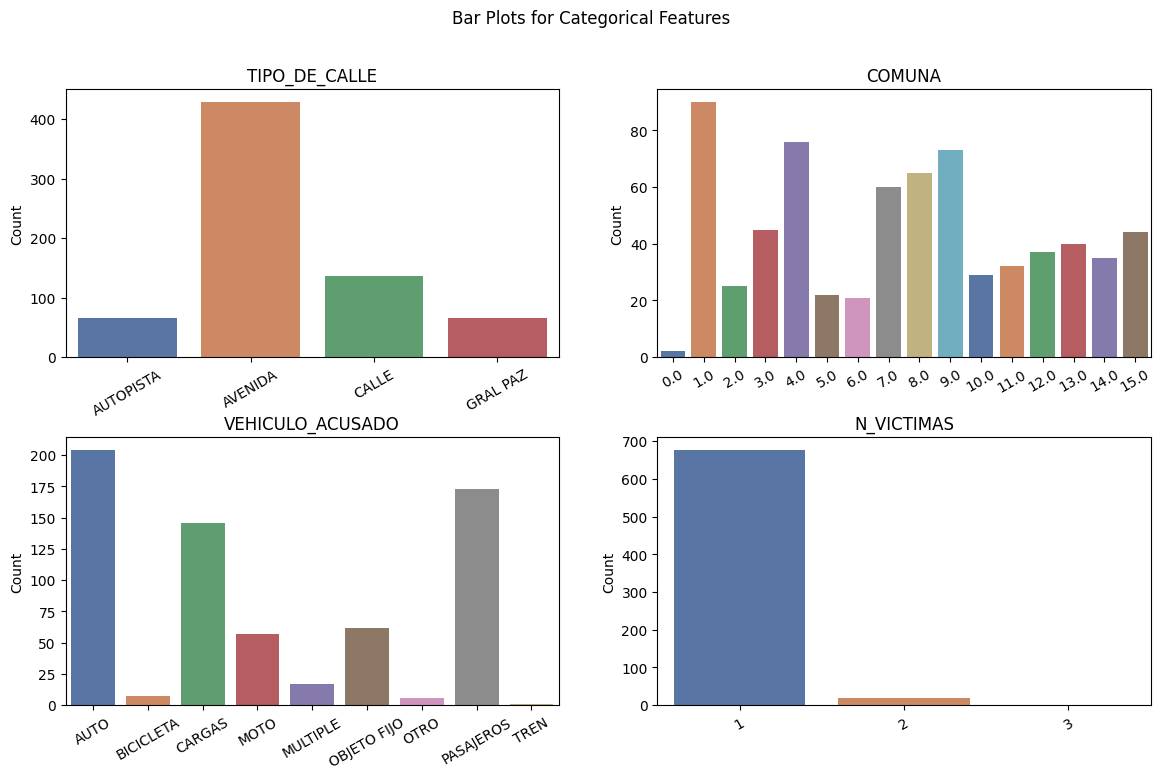

In [161]:
columnas_hom_categoricas = ["TIPO_DE_CALLE","COMUNA","VEHICULO_ACUSADO","N_VICTIMAS"]

def plot_bar_plots(df,columnas):
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    fig.suptitle('Bar Plots for Categorical Features')
    axes = axes.flatten()
    for i, feature in enumerate(columnas):
        sns.countplot(x=df[feature], ax=axes[i], palette=	'deep')
        axes[i].set_title(feature)
        axes[i].set_xlabel(None)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=30)
    
    # separa los plots
    plt.subplots_adjust(hspace=0.3)
    
    

# Plotting the bar plots
plot_bar_plots(df_hom,columnas_hom_categoricas)
plt.show()

> ### SUBPLOTS DE LOS AÑOS, MESES, DIAS Y HORAS DE LOS HOMICIDIOS

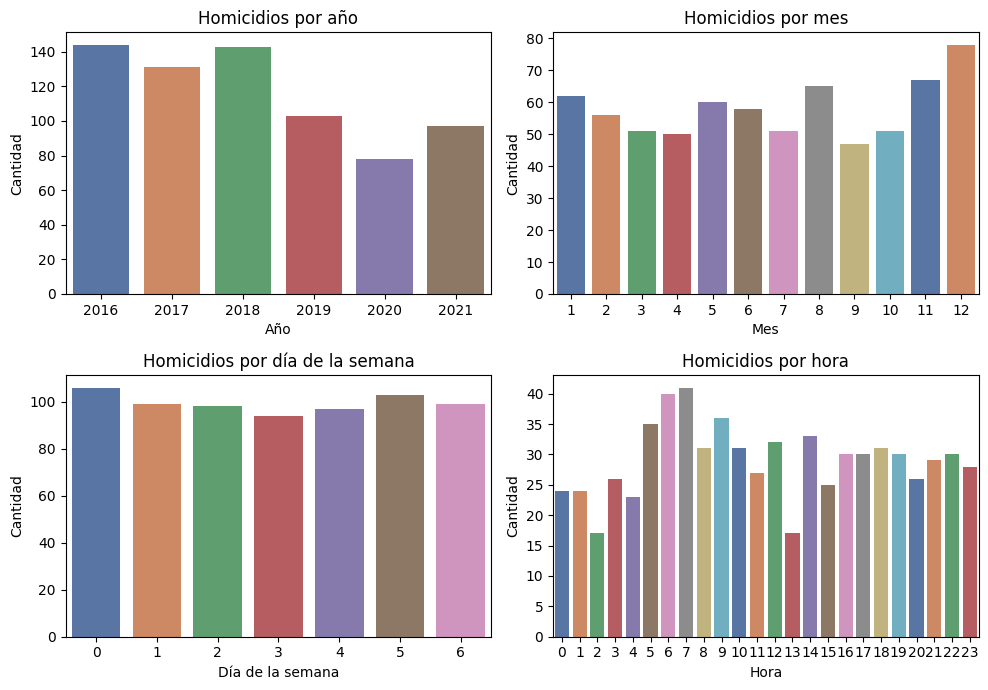

In [162]:
# SUBPLOTS DE LOS AÑOS, MESES, DIAS Y HORAS DE LOS HOMICIDIOS

# Crear el gráfico
plt.figure(figsize=(10, 7))

# Subplot 1: Count plot para los meses de la columna FECHA
plt.subplot(2, 2, 1)  
sns.countplot(x=df_hom['FECHA'].dt.year, palette='deep')
plt.title('Homicidios por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')

# Subplot 2: Count plot para los días de la semana de la columna FECHA
plt.subplot(2, 2, 2)  
sns.countplot(x=df_hom['FECHA'].dt.month , palette='deep')
plt.title('Homicidios por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')

# Subplot 3: Count plot para las horas de la columna HORA
plt.subplot(2, 2, 3)  
sns.countplot(x=df_hom['FECHA'].dt.dayofweek, palette='deep')
plt.title('Homicidios por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad')

# Subplot 4: Count plot para los años de la columna FECHA
plt.subplot(2, 2, 4)  
sns.countplot(x=df_hom['HORA'], palette='deep')
plt.title('Homicidios por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [163]:
df_hom_vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_HECHO          717 non-null    object
 1   FECHA             717 non-null    object
 2   ROL_VICTIMA       706 non-null    object
 3   VEHICULO_VICTIMA  708 non-null    object
 4   SEXO_VICTIMA      711 non-null    object
 5   GRAVEDAD          717 non-null    object
 6   RANGO_ETARIO      664 non-null    object
dtypes: object(7)
memory usage: 39.3+ KB


In [164]:
# cambio de formato a las columnas del df_hom_vic
df_hom_vic['FECHA'] = df_hom_vic['FECHA'].astype('datetime64[ns]')
df_hom_vic['ROL_VICTIMA'] = df_hom_vic['ROL_VICTIMA'].astype('category')
df_hom_vic['SEXO_VICTIMA'] = df_hom_vic['SEXO_VICTIMA'].astype('category')
df_hom_vic['RANGO_ETARIO'] = df_hom_vic['RANGO_ETARIO'].astype('category')

<Figure size 640x480 with 0 Axes>

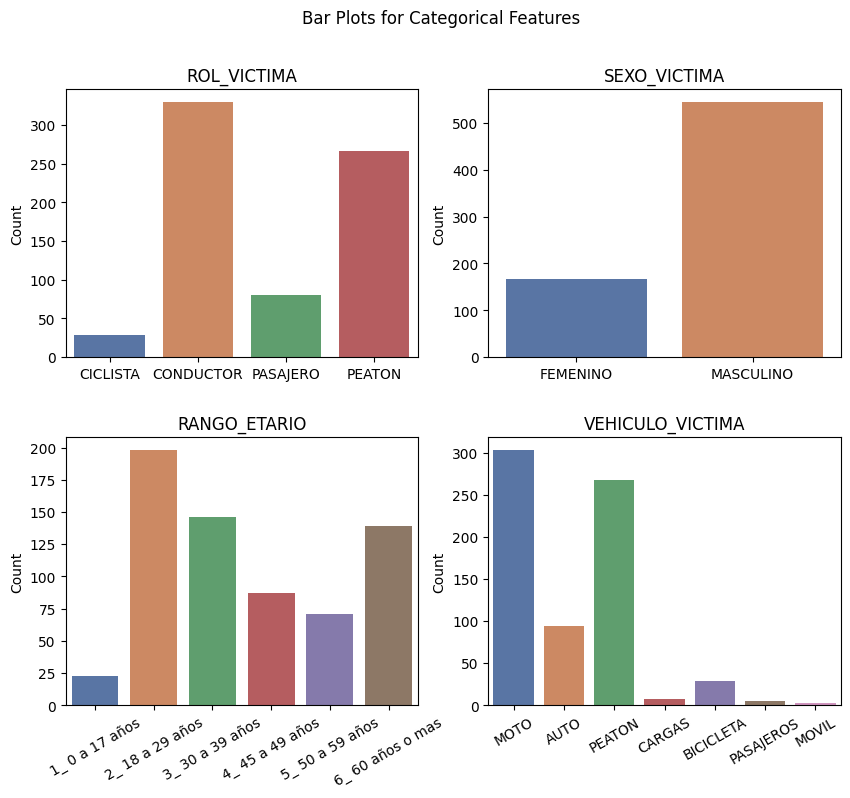

In [165]:
# Crea una función que haga plot de todas las variables categóricas

def plot_bar_plots(df,columnas):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle('Bar Plots for Categorical Features')
    axes = axes.flatten()
    for i, feature in enumerate(columnas):
        sns.countplot(x=df[feature], ax=axes[i], palette='deep')
        axes[i].set_title(feature)
        axes[i].set_xlabel(None)
        axes[i].set_ylabel('Count')
        # Rota solo los labels del eje x en 30 grados solo de la gráfica RANGO_ETARIO
        if feature == 'RANGO_ETARIO' or feature == 'VEHICULO_VICTIMA':
            axes[i].tick_params(axis='x', rotation=30)
    
    
    # separa los plots
    plt.subplots_adjust(hspace=0.3)

plt.tight_layout()

# crea una lista con las columnas categóricas
columnas_hom_categoricas = ["ROL_VICTIMA","SEXO_VICTIMA","RANGO_ETARIO","VEHICULO_VICTIMA"]

# Plotting the bar plots
plot_bar_plots(df_hom_vic,columnas_hom_categoricas)
plt.show()

# Lesiones


In [166]:
df_les = pd.read_csv('datasets\df_lesiones.csv')
df_les_vic = pd.read_csv('datasets\df_vic_les.csv')

In [167]:
df_les.sample(3)

,ID_HECHO,N_VICTIMAS,FECHA,HORA,COMUNA,TIPO_DE_CALLE,XY (CABA),LONGITUD,LATUTID,VEHICULO_ACUSADO
17264,LC-2021-0028599,1,2021-01-20,9.0,15.0,AVENIDA,Point (100936.685965075 103155.468989806),-58.453088,-34.600825,AUTO
9414,LC-2019-0742146,1,2019-11-25,10.0,2.0,NaN,Point (104590.4393055279069813 103473.55056453...,-58.413258,-34.597948,NaN
13650,LC-2020-0476455,1,2020-08-11,22.0,12.0,GRAL PAZ,Point (95300.1806016134 105287.238506982),-58.514523,-34.581598,NaN


In [168]:
# Cambio de tipo a la columna hora
df_les['HORA'] = df_les['HORA'].fillna(0).astype('int')

# cambio a formato categórico
df_les['TIPO_DE_CALLE'] = df_les['TIPO_DE_CALLE'].astype('category')
df_les['COMUNA'] = df_les['COMUNA'].astype('category')
df_les['VEHICULO_ACUSADO'] = df_les['VEHICULO_ACUSADO'].astype('category')

# FECHA
df_les['FECHA'] = df_les['FECHA'].astype('datetime64[ns]')

df_les.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_HECHO          23785 non-null  object        
 1   N_VICTIMAS        23785 non-null  int64         
 2   FECHA             23785 non-null  datetime64[ns]
 3   HORA              23785 non-null  int32         
 4   COMUNA            22328 non-null  category      
 5   TIPO_DE_CALLE     12740 non-null  category      
 6   XY (CABA)         22533 non-null  object        
 7   LONGITUD          22314 non-null  float64       
 8   LATUTID           22314 non-null  float64       
 9   VEHICULO_ACUSADO  8497 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(2), int32(1), int64(1), object(2)
memory usage: 1.2+ MB


Plot de variable categoricas

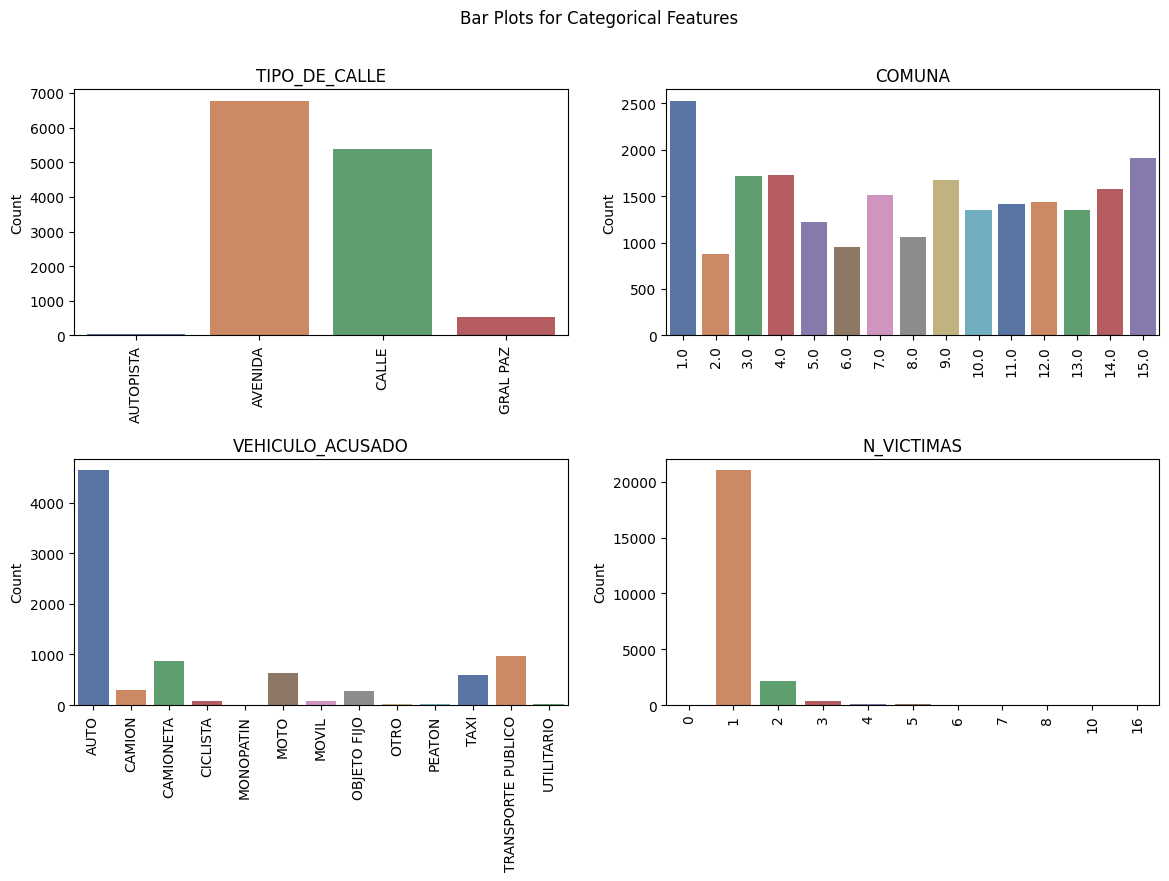

In [169]:
columnas_les_categoricas = ["TIPO_DE_CALLE","COMUNA","VEHICULO_ACUSADO","N_VICTIMAS"]

def plot_bar_plots2(df,columnas):
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    fig.suptitle('Bar Plots for Categorical Features')
    axes = axes.flatten()
    for i, feature in enumerate(columnas):
        sns.countplot(x=df[feature], ax=axes[i], palette=	'deep')
        axes[i].set_title(feature)
        axes[i].set_xlabel(None)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=90)
    
    # separa los plots
    plt.subplots_adjust(hspace=0.5)

# Plotting the bar plots
plot_bar_plots2(df_les,columnas_les_categoricas)
plt.show()

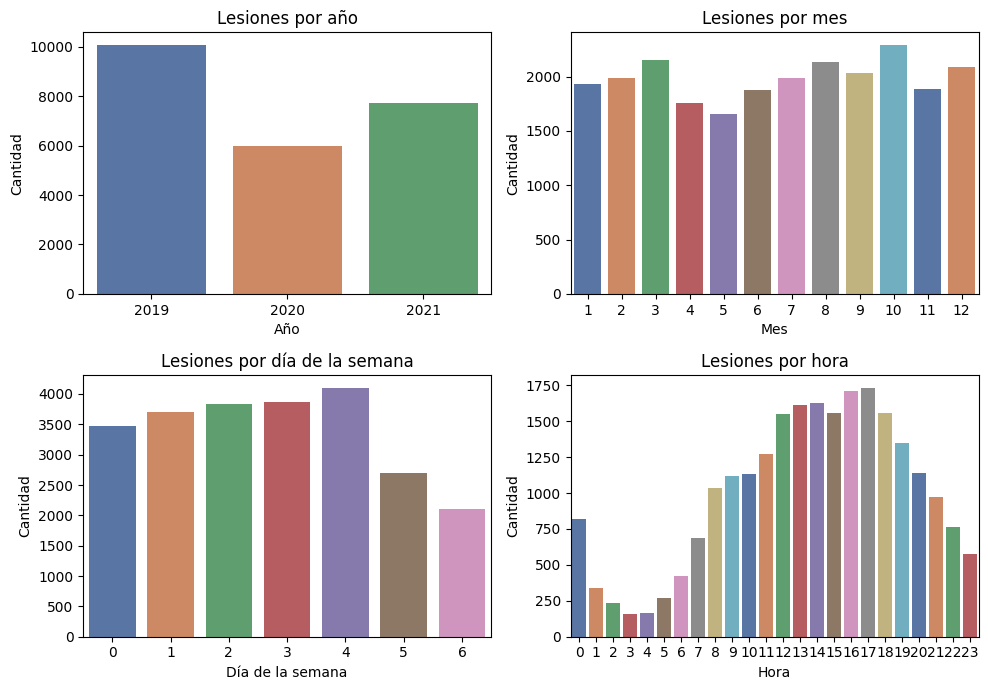

In [170]:
# SUBPLOTS DE LOS AÑOS, MESES, DIAS Y HORAS DE LOS HOMICIDIOS

# Crear el gráfico
plt.figure(figsize=(10, 7))

# Subplot 1: Count plot para los meses de la columna FECHA
plt.subplot(2, 2, 1)
sns.countplot(x=df_les['FECHA'].dt.year, palette='deep')
plt.title('Lesiones por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')

# Subplot 2: Count plot para los días de la semana de la columna FECHA
plt.subplot(2, 2, 2)
sns.countplot(x=df_les['FECHA'].dt.month , palette='deep')
plt.title('Lesiones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')

# Subplot 3: Count plot para las horas de la columna HORA
plt.subplot(2, 2, 3)
sns.countplot(x=df_les['FECHA'].dt.dayofweek, palette='deep')
plt.title('Lesiones por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad')

# Subplot 4: Count plot para los años de la columna FECHA
plt.subplot(2, 2, 4)
sns.countplot(x=df_les['HORA'], palette='deep')
plt.title('Lesiones por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [171]:
df_les_vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_HECHO          27605 non-null  object 
 1   FECHA             27605 non-null  object 
 2   VEHICULO_VICTIMA  11333 non-null  object 
 3   SEXO_VICTIMA      25377 non-null  object 
 4   EDAD_VICTIMA      23134 non-null  float64
 5   GRAVEDAD          27605 non-null  object 
 6   ROL_VICTIMA       0 non-null      float64
 7   RANGO_ETARIO      23134 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.7+ MB


In [172]:
# cambio de formato a las columnas del df_hom_vic
df_les_vic['FECHA'] = df_les_vic['FECHA'].astype('datetime64[ns]')
df_les_vic['ROL_VICTIMA'] = df_les_vic['ROL_VICTIMA'].astype('category')
df_les_vic['SEXO_VICTIMA'] = df_les_vic['SEXO_VICTIMA'].astype('category')
df_les_vic['RANGO_ETARIO'] = df_les_vic['RANGO_ETARIO'].astype('category')


In [173]:
df_les_vic['RANGO_ETARIO']


0         5_ 50 a 59 años
1                     NaN
2                     NaN
3         4_ 45 a 49 años
4         4_ 45 a 49 años
               ...       
27600    6_ 60 años o mas
27601    6_ 60 años o mas
27602     3_ 30 a 39 años
27603     3_ 30 a 39 años
27604     4_ 45 a 49 años
Name: RANGO_ETARIO, Length: 27605, dtype: category
Categories (6, object): ['1_ 0 a 17 años', '2_ 18 a 29 años', '3_ 30 a 39 años', '4_ 45 a 49 años', '5_ 50 a 59 años', '6_ 60 años o mas']

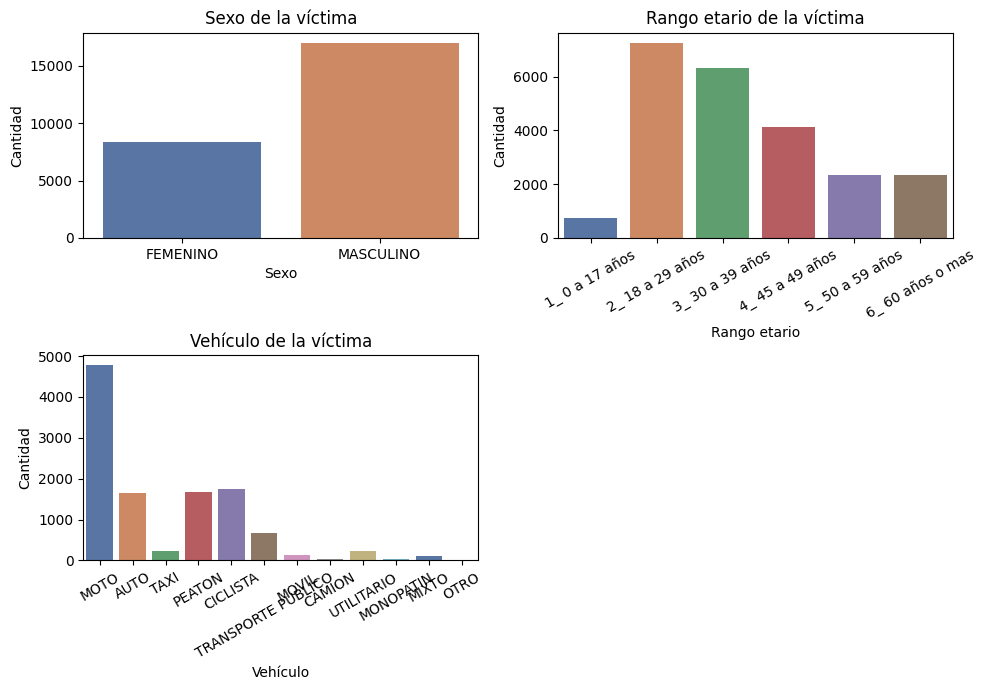

In [174]:
# SUBPLOTS DE LAS COLUMNAS CATEGÓRICAS DEL DF_LES_VIC
XYZ = ["ROL_VICTIMA","SEXO_VICTIMA","RANGO_ETARIO","VEHICULO_VICTIMA"]

# Crear el gráfico
plt.figure(figsize=(10, 7))

# Subplot 1: 
plt.subplot(2, 2, 1)
sns.countplot(x=df_les_vic['SEXO_VICTIMA'] , palette='deep')
plt.title('Sexo de la víctima')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')


# Subplot 2: 
plt.subplot(2, 2, 2)
sns.countplot(x=df_les_vic['RANGO_ETARIO'], palette='deep')
# rotar los labels del eje x en 90 grados
plt.xticks(rotation=30)
plt.title('Rango etario de la víctima')
plt.xlabel('Rango etario')
plt.ylabel('Cantidad')

# Subplot 3:
plt.subplot(2, 2, 3)
sns.countplot(x=df_les_vic['VEHICULO_VICTIMA'], palette='deep')
plt.xticks(rotation=30)
plt.title('Vehículo de la víctima')
plt.xlabel('Vehículo')
plt.ylabel('Cantidad')

# Subplot 4: borrar el subplot
plt.subplot(2, 2, 4)
plt.axis('off') 



# Separar los subplots
plt.subplots_adjust(hspace=0.5)



# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

